In [1]:
import numpy as np
import pynbody
import matplotlib.pyplot as plt
import matplotlib as mpl
import pynbody.plot as pp
import pickle
import pandas as pd
import pynbody.plot.sph as sph

In [2]:
from Star import *

In [3]:
pynbody.config['halo-class-priority'] =  [pynbody.halo.ahf.AHFCatalogue,
                                          pynbody.halo.GrpCatalogue,
                                          pynbody.halo.AmigaGrpCatalogue,
                                          pynbody.halo.legacy.RockstarIntermediateCatalogue,
                                          pynbody.halo.rockstar.RockstarCatalogue,
                                          pynbody.halo.subfind.SubfindCatalogue,
                                          pynbody.halo.hop.HOPCatalogue]

In [4]:
sim1 = '/home/akinshol/Data/Sims/h148.cosmo50PLK.3072g3HbwK1BH/h148.cosmo50PLK.3072g3HbwK1BH.004096/h148.cosmo50PLK.3072g3HbwK1BH.004096'
sim2 = '/home/akinshol/Data/Sims/h229.cosmo50PLK.3072gst5HbwK1BH/h229.cosmo50PLK.3072gst5HbwK1BH.004096/h229.cosmo50PLK.3072gst5HbwK1BH.004096'
sim3 = '/home/akinshol/Data/Sims/h242.cosmo50PLK.3072gst5HbwK1BH/h242.cosmo50PLK.3072gst5HbwK1BH.004096/h242.cosmo50PLK.3072gst5HbwK1BH.004096'
sim4 = '/home/akinshol/Data/Sims/h329.cosmo50PLK.3072gst5HbwK1BH/h329.cosmo50PLK.3072gst5HbwK1BH.004096/h329.cosmo50PLK.3072gst5HbwK1BH.004096'

# here is where we will put whatever halo numbers we decide are interesting and worth computing
# i.e. all the halos with stars in them

nums1 = [1, 2, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 17, 18, 20, 21, 22, 23, 26, 27, 28, 30, 31, 32, 34, 36, 37, 38, 40, 41, 42, 45, 46, 48, 55, 57, 58, 60, 64, 71, 73, 77, 80, 91, 94, 95, 99, 106, 115, 121, 125, 126, 131, 140, 143, 160, 223, 252, 264, 271, 304, 353, 372, 373, 435, 465, 590, 647, 677, 682, 738, 869, 961, 980, 1146, 1155, 1381, 2792, 4897, 10814]
nums2 = [1, 2, 3, 4, 7, 14, 16, 17, 18, 19, 21, 22, 25, 27, 28, 29, 30, 33, 36, 41, 50, 51, 52, 56, 60, 62, 70, 73, 75, 95, 104, 108, 134, 203, 277, 553, 982, 1319, 1409, 1481, 4380, 5722]
nums3 = [1, 4, 9, 10, 11, 12, 19, 24, 29, 30, 33, 36, 39, 40, 45, 46, 48, 53, 57, 62, 66, 69, 70, 72, 75, 76, 85, 89, 102, 133, 152, 185, 211, 302, 425, 457, 536, 1773, 2748, 2891, 9059, 9126, 10085, 11901]
nums4 = [1, 8, 9, 13, 14, 19, 25, 31, 32, 40, 47, 63, 92, 99, 126, 129, 135, 170, 195, 444, 686, 942, 1418]


In [5]:
data1 = []

with open(sim1 + '.data', 'rb') as f:
    while True:
        try:
            data1.append(pickle.load(f,encoding='latin1'))
        except EOFError:print(
            break
        
    data1 = pd.DataFrame(data1)
    
    
data2 = []
    
with open(sim2 + '.data', 'rb') as f:
    while True:
        try:
            data2.append(pickle.load(f,encoding='latin1'))
        except EOFError:
            break
        
    data2 = pd.DataFrame(data2)
    
    
data3 = []
    
with open(sim3 + '.data', 'rb') as f:
    while True:
        try:
            data3.append(pickle.load(f,encoding='latin1'))
        except EOFError:
            break
        
    data3 = pd.DataFrame(data3)
    
    
data4 = []
    
with open(sim4 + '.data', 'rb') as f:
    while True:
        try:
            data4.append(pickle.load(f,encoding='latin1'))
        except EOFError:
            break
        
    data4 = pd.DataFrame(data4)

In [6]:
data = data1.append(data2)
data = data.append(data3)
data = data.append(data4)

In [3]:
s1 = pynbody.load(sim1)
h1 = s1.halos()
s1.physical_units()

In [4]:
s2 = pynbody.load(sim2)
h2 = s2.halos()
s2.physical_units()

In [5]:
s3 = pynbody.load(sim3)
h3 = s3.halos()
s3.physical_units()

In [6]:
s4 = pynbody.load(sim4)
h4 = s4.halos()
s4.physical_units()

# Gas Outflow

In [106]:
for i in range(1,1418):
    halo_info = s4.halos(dummy=True)
    if not halo_info.properties['n_star']==0 and halo_info.properties['fMhires']>0.9:
        dL = .1*halo_info[i].properties['Rvir']
        halo = h4.load_copy(i)
        Rmag = halo['r']
        
        #center on the halos
        pynbody.analysis.halo.center(halo)
        
        #select the particles in a shell
        inner_sphere = pynbody.filt.Sphere(str(.2*halo_info[i].properties['Rvir']) + ' kpc', [0,0,0])
        outer_sphere = pynbody.filt.Sphere(str(.3*halo_info[i].properties['Rvir']) + ' kpc', [0,0,0])
        shell_part = halo[outer_sphere & ~inner_sphere].gas
        
        #Perform calculations
        dL = .1*halo_info[i].properties['Rvir']
        velocity = shell_part['vel']
        r = shell_part['pos'].in_units('kpc')
        Mg = shell_part['mass']
        r_mag = shell_part['r'].in_units('kpc')

        gflowout = np.sum(((np.sum((velocity*r), axis=1)/r_mag)*Mg)/dL)
    
        print(i, gflowout)

In [ ]:
#center on the halos
pynbody.analysis.halo.center(halo) "Does this stay when added to Data Set?"

#select the particles in a shell
inner_sphere1 = pynbody.filt.Sphere(str(.2*halo_info[i].properties['Rvir']) + ' kpc', [0,0,0])
outer_sphere1 = pynbody.filt.Sphere(str(.3*halo_info[i].properties['Rvir']) + ' kpc', [0,0,0])
shell_part1 = halo[outer_sphere & ~inner_sphere].gas

#Perform calculations
dL = .1*halo_info[i].properties['Rvir']/halo.properties['h']
velocity = shell_part1['vel'].in_units('kpc yr**-1')
r = shell_part1['pos'].in_units('kpc')
Mg = shell_part1['mass'].in_units('Msol')
r_mag = shell_part1['r'].in_units('kpc')

gflowout1 = np.sum(((np.sum((velocity*r), axis=1)/r_mag)*Mg)/dL)

#Now for smaller shell

inner_sphere2 = pynbody.filt.Sphere(str(.1*halo_info[i].properties['Rvir']) + ' kpc', [0,0,0])
outer_sphere2 = pynbody.filt.Sphere(str(.2*halo_info[i].properties['Rvir']) + ' kpc', [0,0,0])
shell_part2 = halo[outer_sphere & ~inner_sphere].gas

#Perform calculations
dL = .1*halo_info[i].properties['Rvir']/halo.properties['h']
velocity = shell_part2['vel'].in_units('kpc yr**-1')
r = shell_part2['pos'].in_units('kpc')
Mg = shell_part2['mass'].in_units('Msol')
r_mag = shell_part2['r'].in_units('kpc')

gflowout2 = np.sum(((np.sum((velocity*r), axis=1)/r_mag)*Mg)/dL)


'G_flow_2.5': gflowout1
'G_flow_1.5': gflowout2


# Comparisons

In [144]:
i = 11
halo_info = s3.halos(dummy=True)
dL = .1*halo_info[i].properties['Rvir']
halo = h3.load_copy(i)
Rmag = halo['r']
#center on the halos
pynbody.analysis.halo.center(halo)

In [157]:
inner_sphere = pynbody.filt.Sphere(str(.1*halo_info[i].properties['Rvir']) + ' kpc', [0,0,0])
outer_sphere = pynbody.filt.Sphere(str(.2*halo_info[i].properties['Rvir']) + ' kpc', [0,0,0])
shell_part = halo[outer_sphere & ~inner_sphere].gas

#Perform calculations

#h = 0.6776942783267969 <kpc>

dL = .1*halo_info[i].properties['Rvir']/halo.properties['h']
velocity = shell_part['vel'].in_units('kpc yr**-1')
r = shell_part['pos'].in_units('kpc')
Mg = shell_part['mass'].in_units('Msol')
r_mag = shell_part['r'].in_units('kpc')

#real units are Solar M per second

G_in = []
G_out = []

vr = np.sum((velocity*r), axis=1)

for x in range(len(vr)):
    if vr[x] < 0:
        gin = np.array(((vr[x]/r_mag[x])*Mg[x])/dL)
        G_in = np.append(G_in, gin)
    else:
        gout = np.sum(((vr[x]/r_mag[x])*Mg[x])/dL)
        G_out = np.append(G_out, gout)
ginflow = np.sum(G_in)
goutflow = np.sum(G_out)

-0.5180310263906118
0.3334813519817983


In [159]:
halo.properties

{'omegaM0': 0.3086,
 'omegaL0': 0.6914,
 'h': 0.6776942783267969,
 'boxsize': Unit("5.00e+04 kpc a"),
 'a': 0.9999999999527689,
 'time': Unit("1.41e+01 s kpc km**-1")}

In [141]:
del halo

In [107]:
#Halo Values of Gas outlfow

Sim329: halo1: -2.32631867, -2.54576878 'kpc Msol yr**-1'
        halo9: -0.15071193, -0.24587924 'Msol yr**-1'
        halo31: 0., 0. 'Msol yr**-1'     #has 0 gas particles
Sim148: halo5: 0.00863144, 0.00730126 'kpc Msol yr**-1'
        halo11: 0.06737663, -0.16390474 'kpc Msol yr**-1'    #interesting
        halSimArray([-1422.5103716 , 10617.46780052, 14778.87539234], 'kpc')o12: 0.00027733, 0.00342639 'kpc Msol yr**-1'
        halo6: 0.04727226, 0.29538623 'kpc Msol yr**-1'
        halo9: -0.00487556, -0.00784718 'kpc Msol yr**-1'
        halo10: 0.00879927, -0.00297559 'kpc Msol yr**-1'    #interesting
        halo14: 0.01412389, 0.01197011 'kpc Msol yr**-1'
        halo18: 0.00052651, -0.00024671 'kpc Msol yr**-1'    #interesting
        halo23: 0.00280316, -0.00048771 'kpc Msol yr**-1'    #interesting
        halo26: 0.06308148, 0.15799699 'kpc Msol yr**-1'
        halo28: 0.02011502, 0.05701051 'kpc Msol yr**-1'         
Sim229: halo4: 0.00402296, 0.01387425 'kpc Msol yr**-1'
        halo7: -0.00013934, 0.00253774 'kpc Msol yr**-1'     #interesting
        halo16: 0.00044707, 0.0008245 'kpc Msol yr**-1'
        halo17: 0.00146742, -0.00582587 'kpc Msol yr**-1'    #interesting
        halo22: 0., 0.00023342 'kpc Msol yr**-1' 
Sim242: halo9: -0.21808074, -0.27171717 'kpc Msol yr**-1'
        halo11: 0.00862936, -0.18454967 'kpc Msol yr**-1'

In [83]:
data3['haloid'][data3['M_gas']>0]

0      1
1      9
2     11
5     30
7     39
14    76
Name: haloid, dtype: int64

In [10]:
halo1 = h4.load_copy(1)
halo1.physical_units()
pynbody.analysis.angmom.faceon(halo1)

/home/engelhar/anaconda3/lib/python3.7/site-packages/pynbody/array.py:346: RuntimeWarning: divide by zero encountered in true_divide
  return np.ndarray.__truediv__(self, rhs)
/home/engelhar/anaconda3/lib/python3.7/site-packages/pynbody/array.py:346: RuntimeWarning: invalid value encountered in true_divide
  return np.ndarray.__truediv__(self, rhs)


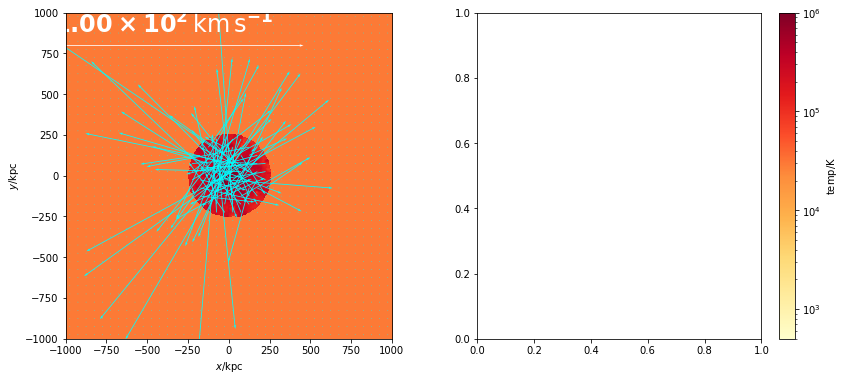

In [11]:
f, axs = plt.subplots(1,2,figsize=(14,6))
sph.velocity_image(halo1.g, vector_color="cyan", qty="temp",width=2000,cmap="YlOrRd",
                   denoise=True,approximate_fast=False, subplot=axs[0], show_cbar = True, vmin=5e2, vmax=1e6)
plt.savefig('Gas Flow Halo 5', dpi=300)
plt.show()
del halo1

In [12]:
halo9 = h4.load_copy(9)
halo9.physical_units()
pynbody.analysis.angmom.faceon(halo9)

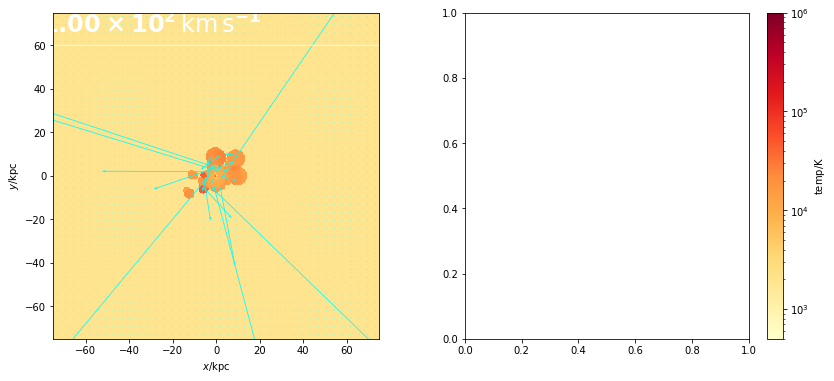

In [13]:
f, axs = plt.subplots(1,2,figsize=(14,6))
sph.velocity_image(halo9.g, vector_color="cyan", qty="temp",width=150,cmap="YlOrRd",
                   denoise=True,approximate_fast=False, subplot=axs[0], show_cbar = True, vmin=5e2, vmax=1e6)
plt.savefig('Gas Flow Halo 5', dpi=300)
plt.show()
del halo9

In [152]:
halo5 = h1.load_copy(5)
halo5.physical_units()

In [154]:
pynbody.analysis.angmom.faceon(halo5)

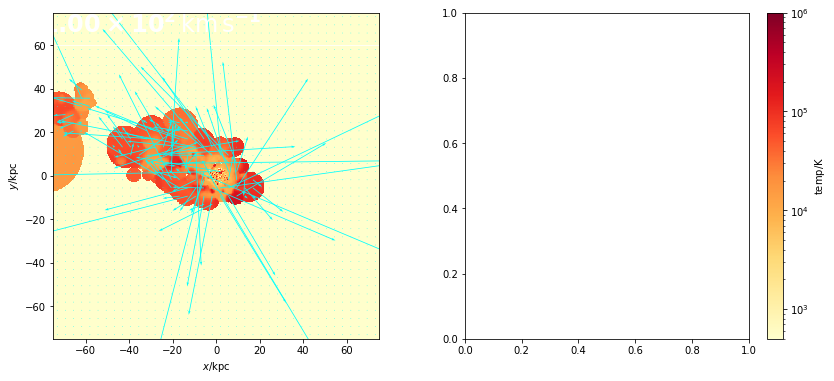

In [155]:
f, axs = plt.subplots(1,2,figsize=(14,6))
sph.velocity_image(halo5.g, vector_color="cyan", qty="temp",width=150,cmap="YlOrRd",
                   denoise=True,approximate_fast=False, subplot=axs[0], show_cbar = True, vmin=5e2, vmax=1e6)
plt.savefig('Gas Flow Halo 5', dpi=300)
plt.show()

In [158]:
halo11 = h1.load_copy(11)
halo11.physical_units()

In [159]:
pynbody.analysis.angmom.faceon(halo11)

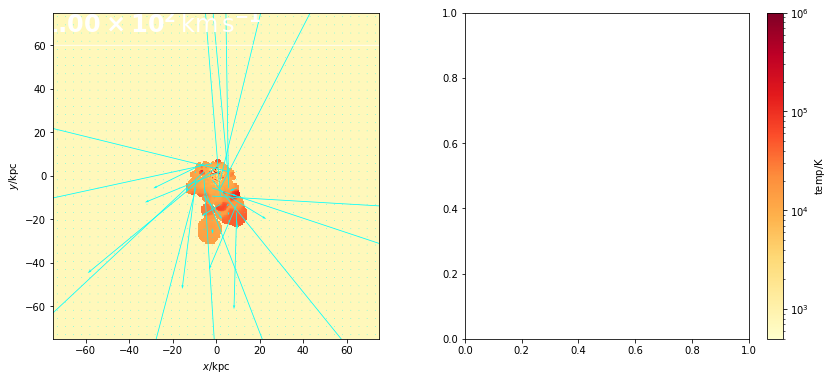

In [160]:
f, axs = plt.subplots(1,2,figsize=(14,6))
sph.velocity_image(halo11.g, vector_color="cyan", qty="temp",width=150,cmap="YlOrRd",
                   denoise=True,approximate_fast=False, subplot=axs[0], show_cbar = True, vmin=5e2, vmax=1e6)
plt.savefig('Gas Flow Halo 11', dpi=300)s()
plt.show()

In [165]:
halo12 = h1.load_copy(12)
halo12.physical_units()

In [166]:
pynbody.analysis.angmom.faceon(halo12)

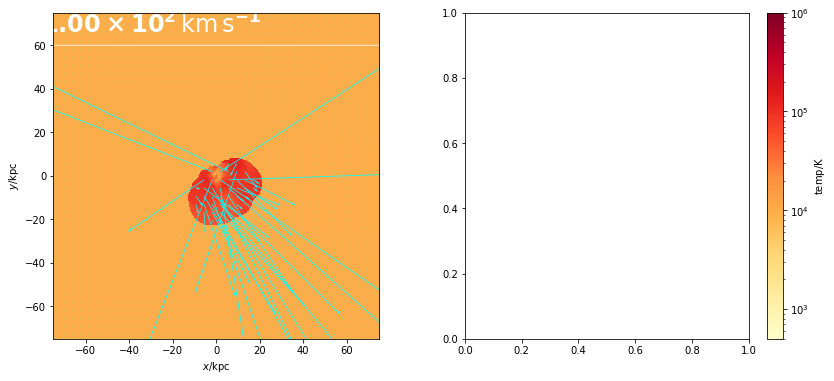

In [168]:
f, axs = plt.subplots(1,2,figsize=(14,6))
sph.velocity_image(halo12.g, vector_color="cyan", qty="temp",width=150,cmap="YlOrRd",
                   denoise=True,approximate_fast=False, subplot=axs[0], show_cbar = True, vmin=5e2, vmax=1e6)
plt.savefig('Gas Flow Halo 12', dpi=300)
plt.show()
del halo12

In [169]:
halo4 = h2.load_copy(4)
halo4.physical_units()
pynbody.analysis.angmom.faceon(halo4)

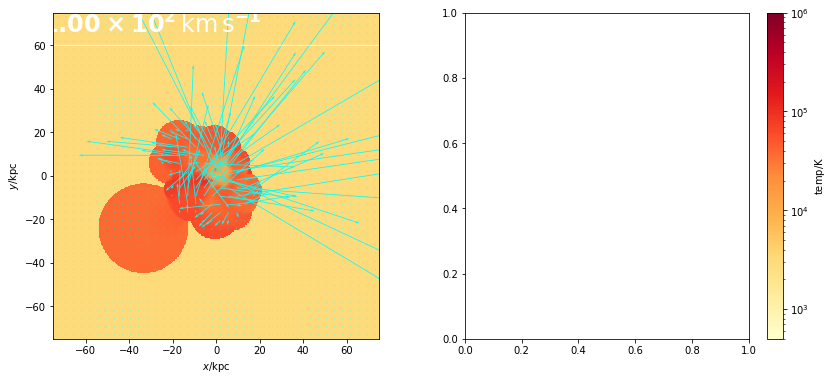

In [170]:
f, axs = plt.subplots(1,2,figsize=(14,6))
sph.velocity_image(halo4.g, vector_color="cyan", qty="temp",width=150,cmap="YlOrRd",
                   denoise=True,approximate_fast=False, subplot=axs[0], show_cbar = True, vmin=5e2, vmax=1e6)
plt.savefig('Gas Flow Halo 4', dpi=300)
plt.show()
del halo4

In [171]:
halo7 = h2.load_copy(7)
halo7.physical_units()
pynbody.analysis.angmom.faceon(halo7)

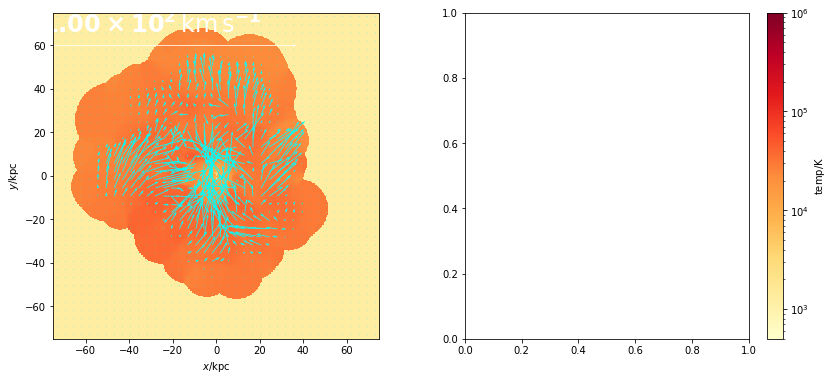

In [172]:
f, axs = plt.subplots(1,2,figsize=(14,6))
sph.velocity_image(halo7.g, vector_color="cyan", qty="temp",width=150,cmap="YlOrRd",
                   denoise=True,approximate_fast=False, subplot=axs[0], show_cbar = True, vmin=5e2, vmax=1e6)
plt.savefig('Gas Flow Halo 1', dpi=300)
plt.show()
del halo7

In [173]:
halo9 = h3.load_copy(9)
halo9.physical_units()
pynbody.analysis.angmom.faceon(halo9)

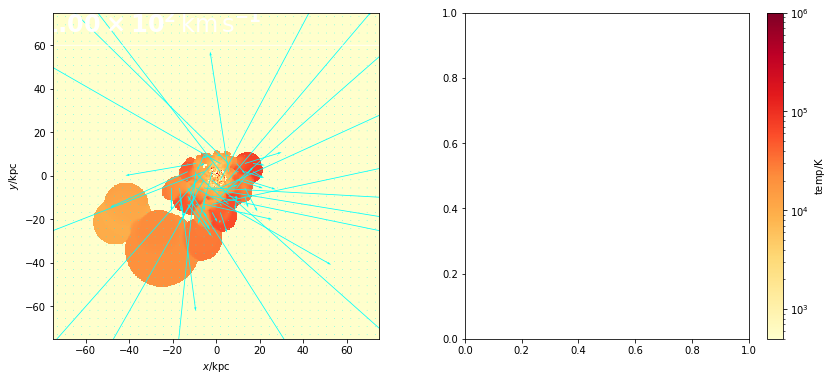

In [174]:
f, axs = plt.subplots(1,2,figsize=(14,6))
sph.velocity_image(halo9.g, vector_color="cyan", qty="temp",width=150,cmap="YlOrRd",
                   denoise=True,approximate_fast=False, subplot=axs[0], show_cbar = True, vmin=5e2, vmax=1e6)
plt.savefig('Gas Flow Halo 1', dpi=300)
plt.show()
del halo9

In [25]:
halo11 = h3.load_copy(11)
halo11.physical_units()
pynbody.analysis.angmom.faceon(halo11)

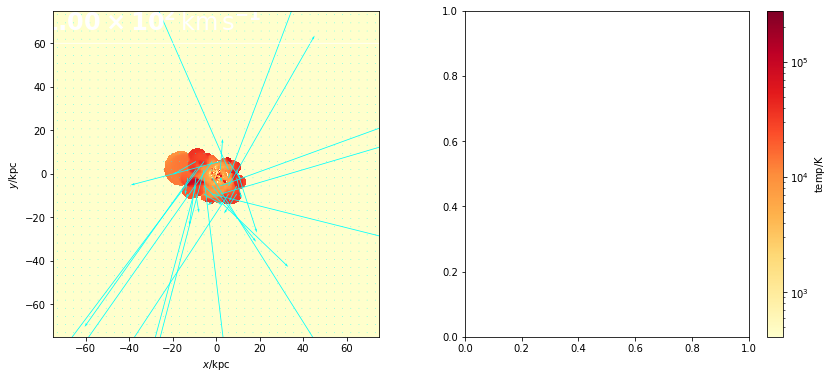

In [30]:
f, axs = plt.subplots(1,2,figsize=(14,6))
sph.velocity_image(halo11.g, vector_color="cyan", qty="temp",width=150,cmap="YlOrRd",
                   denoise=True,approximate_fast=False, subplot=axs[0], show_cbar = True)
plt.savefig('Gas Flow Halo 1', dpi=300)

del halo11

In [50]:
halo6 = h1.load_copy(6)
halo6.physical_units()
pynbody.analysis.angmom.faceon(halo6)

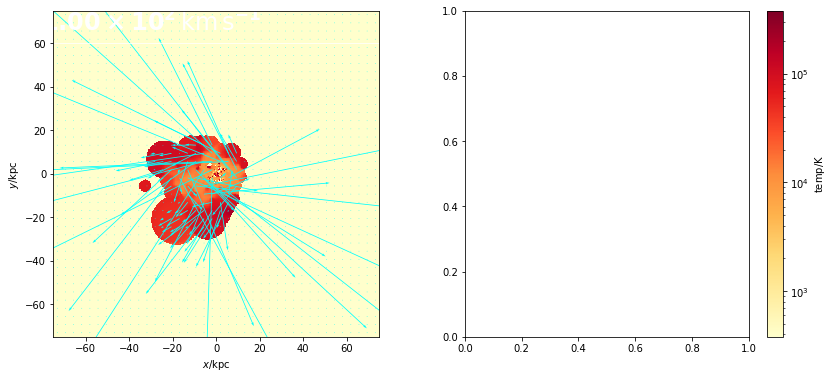

In [51]:
f, axs = plt.subplots(1,2,figsize=(14,6))
sph.velocity_image(halo6.g, vector_color="cyan", qty="temp",width=150,cmap="YlOrRd",
                   denoise=True,approximate_fast=False, subplot=axs[0], show_cbar = True)

del halo6

In [52]:
halo9 = h1.load_copy(9)
halo9.physical_units()
pynbody.analysis.angmom.faceon(halo9)

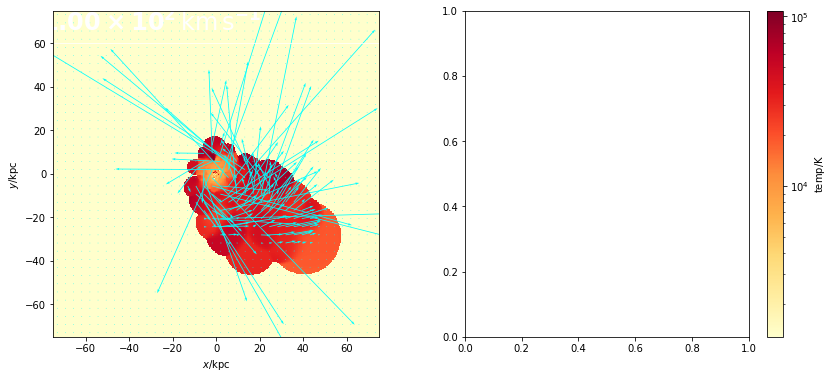

In [54]:
f, axs = plt.subplots(1,2,figsize=(14,6))
sph.velocity_image(halo9.g, vector_color="cyan", qty="temp",width=150,cmap="YlOrRd",
                   denoise=True,approximate_fast=False, subplot=axs[0], show_cbar = True)
plt.savefig('Gas Flow Halo 1', dpi=300)

del halo9

In [55]:
halo10 = h1.load_copy(10)
halo10.physical_units()
pynbody.analysis.angmom.faceon(halo10)

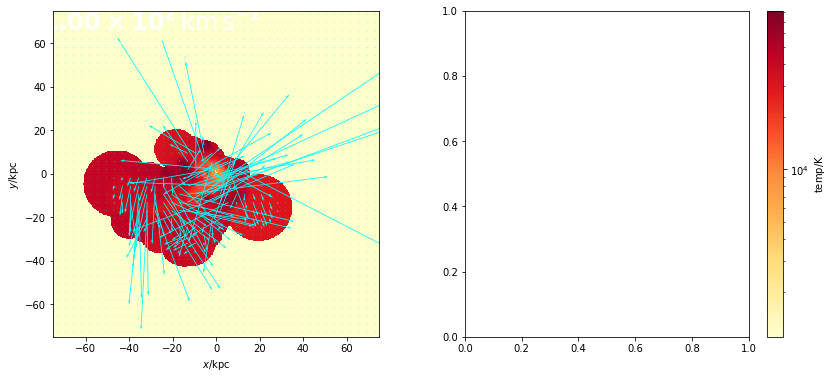

In [56]:
f, axs = plt.subplots(1,2,figsize=(14,6))
sph.velocity_image(halo10.g, vector_color="cyan", qty="temp",width=150,cmap="YlOrRd",
                   denoise=True,approximate_fast=False, subplot=axs[0], show_cbar = True)

del halo10

In [57]:
halo14 = h1.load_copy(14)
halo14.physical_units()
pynbody.analysis.angmom.faceon(halo14)

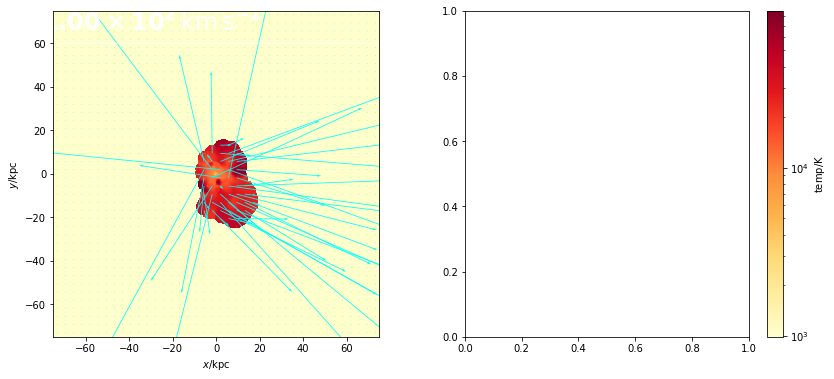

In [58]:
f, axs = plt.subplots(1,2,figsize=(14,6))
sph.velocity_image(halo14.g, vector_color="cyan", qty="temp",width=150,cmap="YlOrRd",
                   denoise=True,approximate_fast=False, subplot=axs[0], show_cbar = True)
del halo14

In [59]:
halo18 = h1.load_copy(18)
halo18.physical_units()
pynbody.analysis.angmom.faceon(halo18)

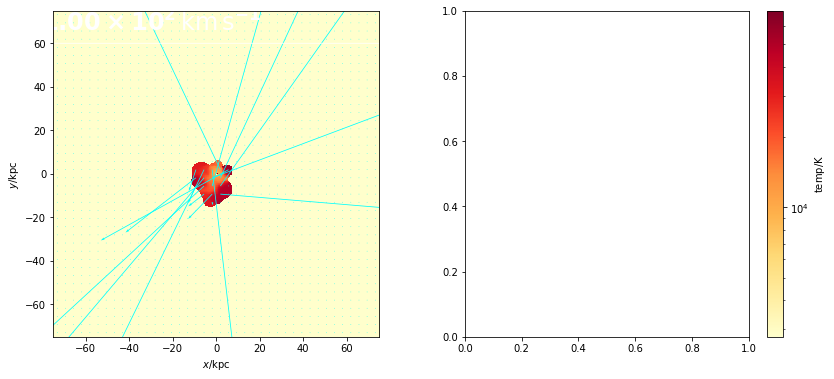

In [60]:
f, axs = plt.subplots(1,2,figsize=(14,6))
sph.velocity_image(halo18.g, vector_color="cyan", qty="temp",width=150,cmap="YlOrRd",
                   denoise=True,approximate_fast=False, subplot=axs[0], show_cbar = True)

del halo18

In [61]:
halo23 = h1.load_copy(23)
halo23.physical_units()
pynbody.analysis.angmom.faceon(halo23)

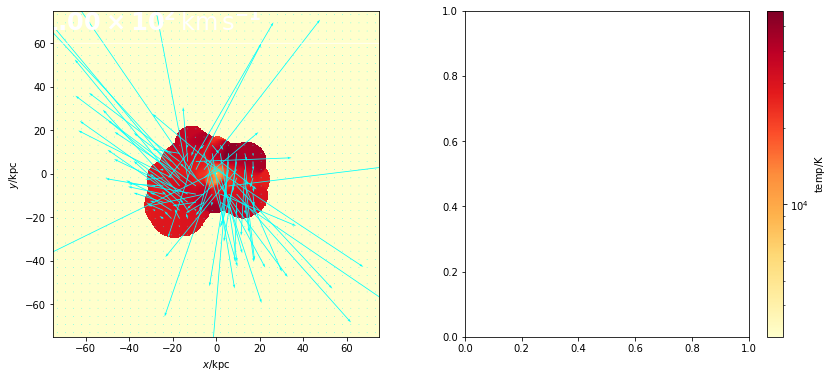

In [62]:
f, axs = plt.subplots(1,2,figsize=(14,6))
sph.velocity_image(halo23.g, vector_color="cyan", qty="temp",width=150,cmap="YlOrRd",
                   denoise=True,approximate_fast=False, subplot=axs[0], show_cbar = True)
plt.savefig('Gas Flow Halo 1', dpi=300)

del halo23

In [63]:
halo26 = h1.load_copy(26)
halo26.physical_units()
pynbody.analysis.angmom.faceon(halo26)

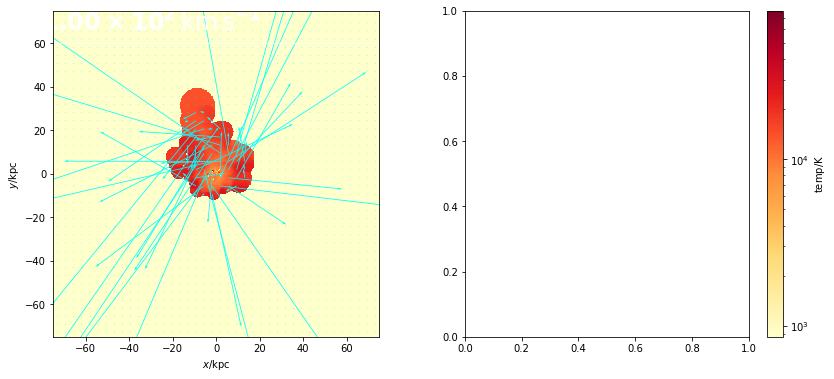

In [64]:
f, axs = plt.subplots(1,2,figsize=(14,6))
sph.velocity_image(halo26.g, vector_color="cyan", qty="temp",width=150,cmap="YlOrRd",
                   denoise=True,approximate_fast=False, subplot=axs[0], show_cbar = True)
plt.savefig('Gas Flow Halo 1', dpi=300)

del halo26

In [65]:
halo28 = h1.load_copy(28)
halo28.physical_units()
pynbody.analysis.angmom.faceon(halo28)

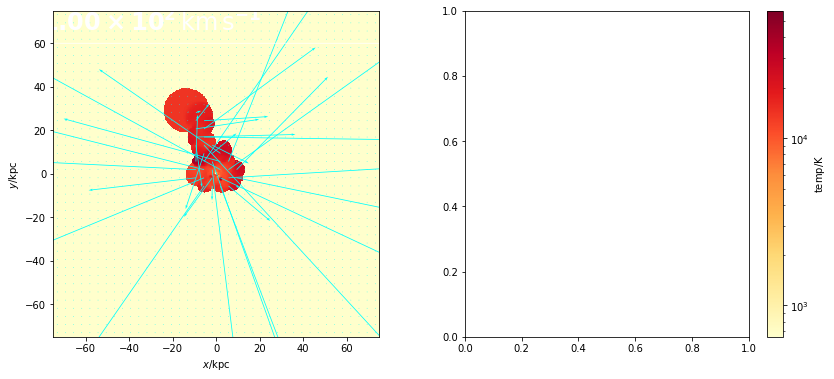

In [66]:
f, axs = plt.subplots(1,2,figsize=(14,6))
sph.velocity_image(halo28.g, vector_color="cyan", qty="temp",width=150,cmap="YlOrRd",
                   denoise=True,approximate_fast=False, subplot=axs[0], show_cbar = True)
plt.savefig('Gas Flow Halo 1', dpi=300)

del halo28

In [71]:
halo16 = h2.load_copy(16)
halo16.physical_units()
pynbody.analysis.angmom.faceon(halo16)

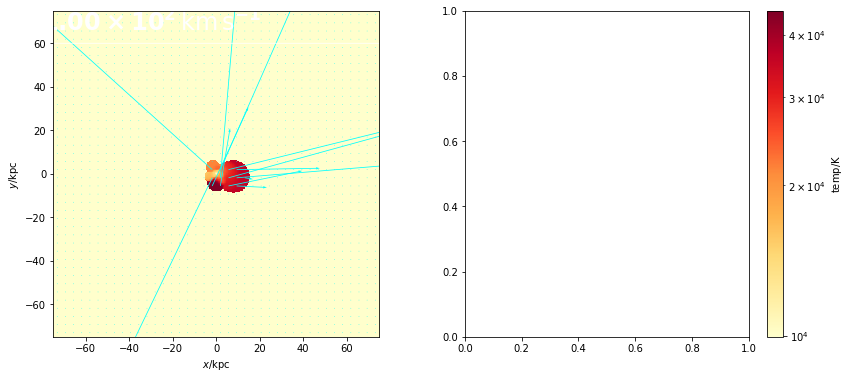

In [72]:
f, axs = plt.subplots(1,2,figsize=(14,6))
sph.velocity_image(halo16.g, vector_color="cyan", qty="temp",width=150,cmap="YlOrRd",
                   denoise=True,approximate_fast=False, subplot=axs[0], show_cbar = True)
plt.savefig('Gas Flow Halo 1', dpi=300)

del halo16

In [77]:
halo17 = h2.load_copy(17)
halo17.physical_units()
pynbody.analysis.angmom.faceon(halo17)

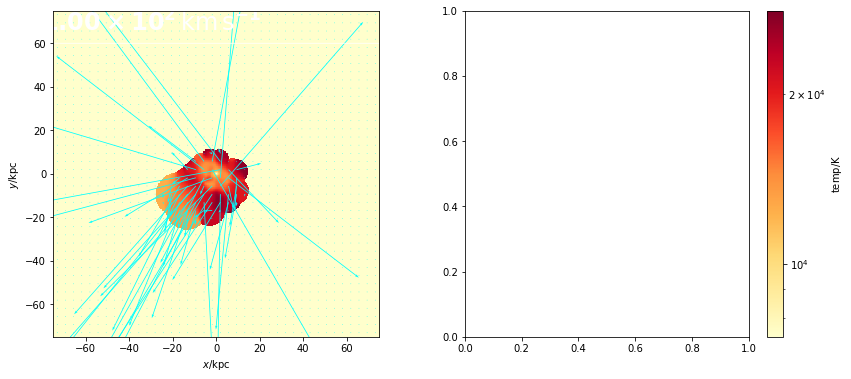

In [78]:
f, axs = plt.subplots(1,2,figsize=(14,6))
sph.velocity_image(halo17.g, vector_color="cyan", qty="temp",width=150,cmap="YlOrRd",
                   denoise=True,approximate_fast=False, subplot=axs[0], show_cbar = True)
plt.savefig('Gas Flow Halo 1', dpi=300)

del halo17

In [81]:
halo22 = h1.load_copy(22)
halo22.physical_units()
pynbody.analysis.angmom.faceon(halo22)

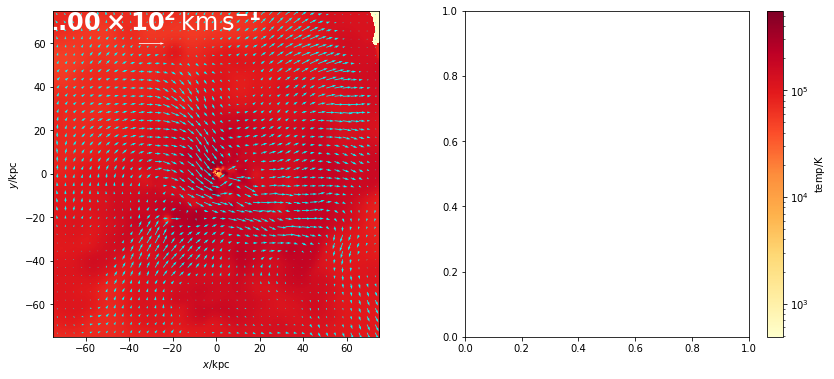

In [82]:
f, axs = plt.subplots(1,2,figsize=(14,6))
sph.velocity_image(halo22.g, vector_color="cyan", qty="temp",width=150,cmap="YlOrRd",
                   denoise=True,approximate_fast=False, subplot=axs[0], show_cbar = True)
plt.savefig('Gas Flow Halo 1', dpi=300)

del halo22